In [1]:
# 배열의 크기와 반복 횟수 설정
sizes = [
    100, 250, 500, 750, 
    1000, 2500, 5000, 7500, 
    10000, 25000, 50000, 75000, 
    100000, 250000, 500000, 750000,
    1000000
]  # 배열의 크기 
iterations = 50 # 각 크기별 평균을 내기 위해 반복할 횟수

''' 
    c로 만든 두 가지 정렬의 시간을 구해 파일에 추가하는 어플리케이션을
    위 두 가지 sizes, iterations을 사용하여, 반복해서 값을 구한다.
'''
for i in sizes:
    for j in range(iterations):
        !./main.out {i}

qiucksort: elapsed time: 0 milliseconds
merge sort: elapsed time: 0 milliseconds
qiucksort: elapsed time: 0 milliseconds
merge sort: elapsed time: 0 milliseconds
qiucksort: elapsed time: 0 milliseconds
merge sort: elapsed time: 0 milliseconds
qiucksort: elapsed time: 0 milliseconds
merge sort: elapsed time: 0 milliseconds
qiucksort: elapsed time: 0 milliseconds
merge sort: elapsed time: 0 milliseconds
qiucksort: elapsed time: 0 milliseconds
merge sort: elapsed time: 0 milliseconds
qiucksort: elapsed time: 0 milliseconds
merge sort: elapsed time: 0 milliseconds
qiucksort: elapsed time: 0 milliseconds
merge sort: elapsed time: 0 milliseconds
qiucksort: elapsed time: 0 milliseconds
merge sort: elapsed time: 0 milliseconds
qiucksort: elapsed time: 0 milliseconds
merge sort: elapsed time: 0 milliseconds
qiucksort: elapsed time: 0 milliseconds
merge sort: elapsed time: 0 milliseconds
qiucksort: elapsed time: 0 milliseconds
merge sort: elapsed time: 0 milliseconds
qiucksort: elapsed time: 0 m

In [2]:
'''
    위에서 구한 정렬 시간을 저장한 파일을 가져와서 딕셔너리에 담는다.
'''
# 시간의 합을 저장할 딕셔너리 컨테이너
quick_sort_times = {}
merge_sort_times = {}

# c 어플리케이션 main.out으로 생성, 추가된 파일 'sort_compare.txt'를 가져와 한 줄 씩 읽는다.
with open('sort_compare.txt', 'r') as f:
    # '/n'문자을 기준으로 한 줄씩 가져와 읽는다.
    for line in f:
        size, quick_sort_time, merge_sort_time = map(int, line.strip().split()) 
                                                    # .strip(): 양쪽 '\n'문자 제거 
                                                    # .split(): ' '를 기준으로, 토큰화
        # 딕셔너리 컨테이너에 있는지 현재 크기의 시간 데이터가 있는지 확인
        # 없으면 추가                                            
        if quick_sort_times.get(size) == None:
            quick_sort_times[size] = quick_sort_time
            merge_sort_times[size] = merge_sort_time
        # 있으면 합쳐준다.
        else:
            quick_sort_times[size] += quick_sort_time
            merge_sort_times[size] += merge_sort_time
            
# 결과 각 sizes(N)의 배열을 정렬할 때 걸리는 시간의 합을 저장하는 딕셔너리를 얻을 수 있다.
print(f"quick_sort_times: {quick_sort_times}")
print(f"merge_sort_times: {merge_sort_times}")

quick_sort_times: {100: 0, 250: 1, 500: 1, 750: 3, 1000: 1, 2500: 11, 5000: 17, 7500: 29, 10000: 41, 25000: 102, 50000: 218, 75000: 355, 100000: 464, 250000: 1268, 500000: 2703, 750000: 4218, 1000000: 5759}
merge_sort_times: {100: 1, 250: 0, 500: 1, 750: 1, 1000: 3, 2500: 9, 5000: 24, 7500: 36, 10000: 49, 25000: 131, 50000: 281, 75000: 431, 100000: 598, 250000: 1625, 500000: 3444, 750000: 5297, 1000000: 7229}


In [3]:
# 딕셔너리에 저장된 정렬 시간의 평균을 구하는 함수
def average(times: dict, iterations: int) -> list:
    time_average_list: list = []
    for size, sum_time in times.items():
        average: float = sum_time / iterations
        time_average_list.append(average)
    return time_average_list

In [4]:
quick_sort_average = average(quick_sort_times, iterations)
merge_sort_average = average(merge_sort_times, iterations)

print(f"quick_sort_average: {quick_sort_average}")
print(f"merge_sort_average: {merge_sort_average}")

quick_sort_average: [0.0, 0.02, 0.02, 0.06, 0.02, 0.22, 0.34, 0.58, 0.82, 2.04, 4.36, 7.1, 9.28, 25.36, 54.06, 84.36, 115.18]
merge_sort_average: [0.02, 0.0, 0.02, 0.02, 0.06, 0.18, 0.48, 0.72, 0.98, 2.62, 5.62, 8.62, 11.96, 32.5, 68.88, 105.94, 144.58]


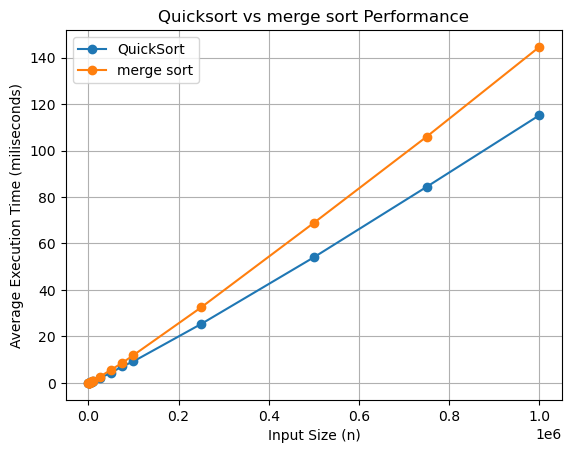

In [7]:
import matplotlib.pyplot as plt
# 데이터를 그래프로 그려주는 라이브러리 설치 필요
# print(sizes)
# 결과 그래프 그리기
        # x, y 각 데이터는 list 혹은 Numpy array 형태여야 한다.
plt.plot(sizes, quick_sort_average, label='QuickSort', marker='o')
plt.plot(sizes, merge_sort_average, label='merge sort', marker='o')
plt.xlabel('Input Size (n)')
plt.ylabel('Average Execution Time (miliseconds)')
plt.title('Quicksort vs merge sort Performance')
plt.legend()
plt.grid(True)
plt.show()